In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('data/aps_failure_training_set.csv')
train_df.pop('id')

0            1
1            2
2            3
3            4
4            5
         ...  
59995    59996
59996    59997
59997    59998
59998    59999
59999    60000
Name: id, Length: 60000, dtype: int64

In [3]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
cols = pd.Series(train_df.columns)

counts = cols.apply(lambda x: x.split("_")[0]).value_counts().to_dict()
categorical_cols_idx = cols.apply(
    lambda x: True if counts[x.split("_")[0]] > 1 else False)

#get the columns that are categorical
categorical_cols = cols[categorical_cols_idx]

categorical_cols

7      ag_000
8      ag_001
9      ag_002
10     ag_003
11     ag_004
        ...  
164    ee_005
165    ee_006
166    ee_007
167    ee_008
168    ee_009
Length: 70, dtype: object

In [5]:
categorical_cols.apply(lambda x: x.split("_")[0]).value_counts().to_dict()

{'ag': 10, 'ay': 10, 'az': 10, 'ba': 10, 'cn': 10, 'cs': 10, 'ee': 10}

<Axes: >

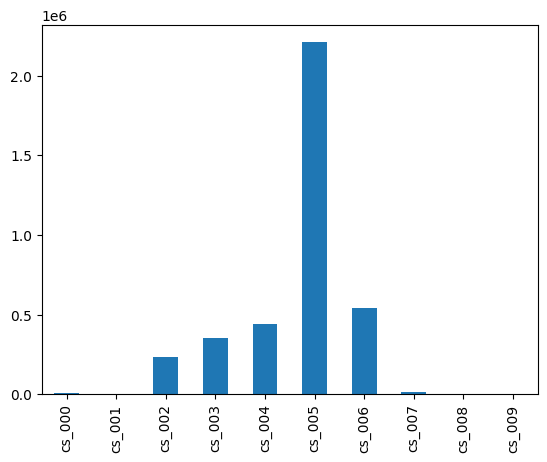

In [6]:
#given this dataset plot the means train_df.filter(regex='cs_[0-9][0-9][0-9]')
train_df.filter(regex='cs_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

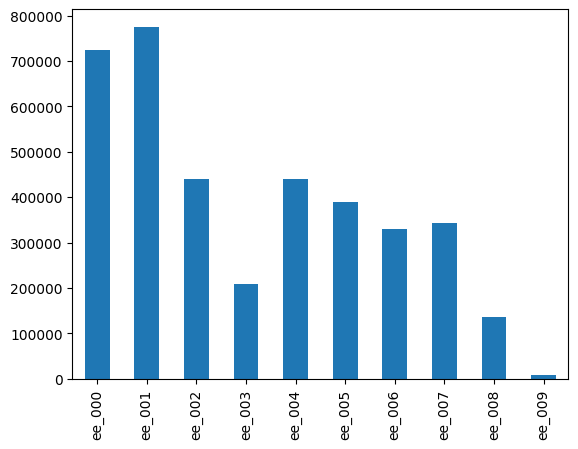

In [7]:
train_df.filter(regex='ee_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

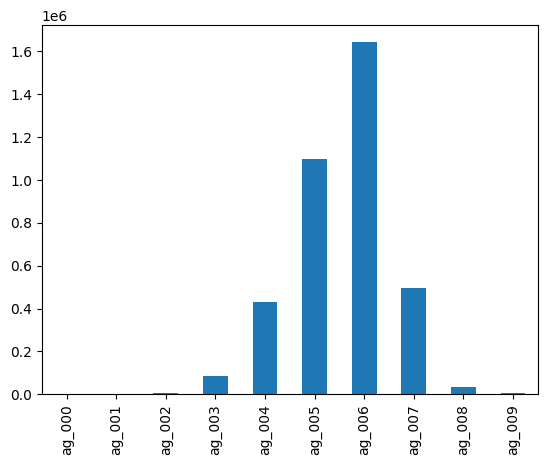

In [8]:
train_df.filter(regex='ag_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

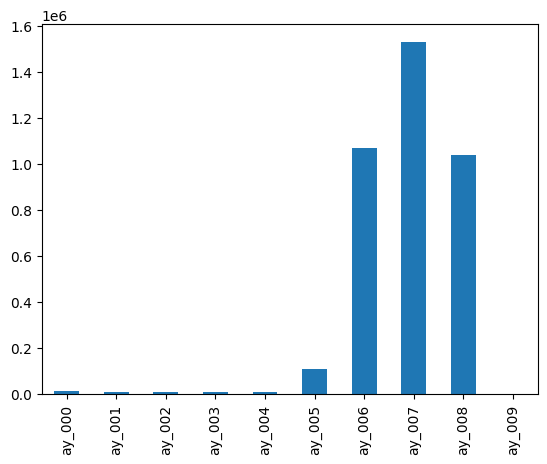

In [9]:
train_df.filter(regex='ay_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

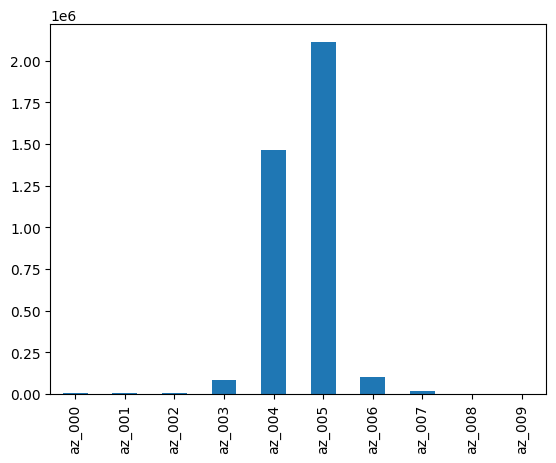

In [10]:
train_df.filter(regex='az_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

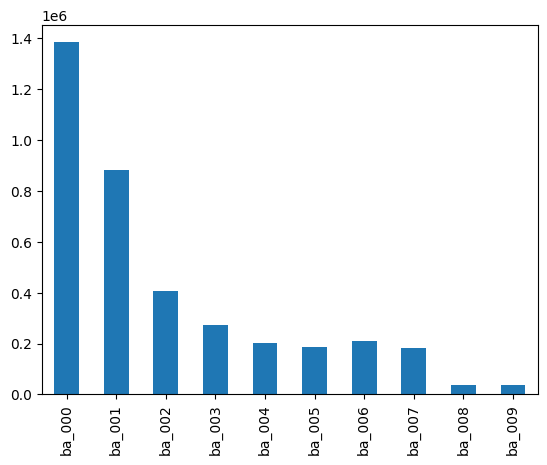

In [11]:
train_df.filter(regex='ba_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

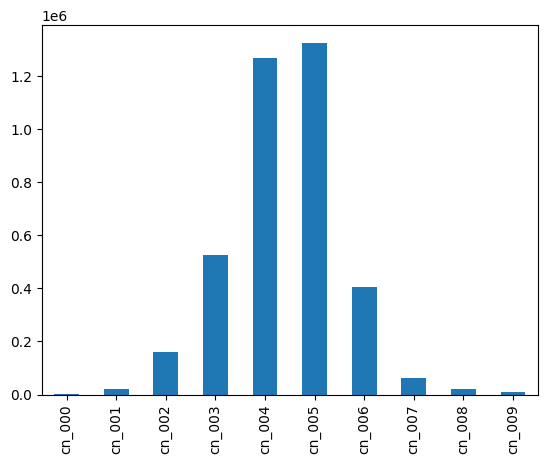

In [12]:
train_df.filter(regex='cn_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

In [13]:
train_df_for_corr = train_df.copy()

In [14]:
#look at the correlation between the columns against the targe
train_df_for_corr["class"] = train_df_for_corr["class"].replace(['neg', 'pos'], [0, 1])
train_df_for_corr = train_df_for_corr.replace('na', 0).astype(float).corr()
labels = train_df.pop('class')

In [15]:
#get non categorical columns
numerical_columns = cols[~categorical_cols_idx]
numerical_columns = numerical_columns[2:]

In [16]:
numerical_columns

2      ab_000
3      ac_000
4      ad_000
5      ae_000
6      af_000
        ...  
156    eb_000
157     ec_00
158    ed_000
169    ef_000
170    eg_000
Length: 99, dtype: object

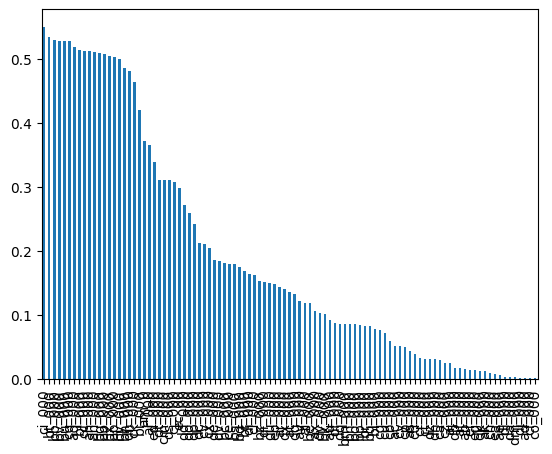

In [17]:
train_df_for_corr["class"].abs()[numerical_columns].sort_values(ascending=False).plot(kind='bar')
relevant_col_bools = train_df_for_corr["class"].abs()[numerical_columns].sort_values(ascending=False) > 0.3

In [18]:
#get the columns that are relevant
relevant_numerical_cols = relevant_col_bools[relevant_col_bools].index

In [ ]:
#add two column types together
num_cat_cols = pd.Index(categorical_cols).append(pd.Index(relevant_numerical_cols))

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = labels.apply(lambda x: 1 if x == 'pos' else 0).values
X = train_df[categorical_cols].replace('na', 0).astype(int).values

X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)

/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19470
           1       0.76      0.54      0.63       330

    accuracy                           0.99     19800
   macro avg       0.87      0.77      0.81     19800
weighted avg       0.99      0.99      0.99     19800

[[19413    57]
 [  152   178]]


In [39]:
test_df = pd.read_csv('data/aps_failure_test_set.csv')
X = test_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

In [22]:
def labelize(x):
    if x == 1:
        return 'pos'
    else:
        return 'neg'
labelize = np.vectorize(labelize)

In [24]:
output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical values standardized logistic regression, output.csv', index=False)

In [25]:
from preprocessing import FactorAnalysis

FA = FactorAnalysis(50)
X = train_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)

FA.fit(X_transformed)
X_transformed_ = FA.transform(X_transformed)

X_train, X_test, y_train, y_test = train_test_split(X_transformed_, Y, test_size=0.33, random_state=42, stratify=Y)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19470
           1       0.74      0.51      0.61       330

    accuracy                           0.99     19800
   macro avg       0.87      0.75      0.80     19800
weighted avg       0.99      0.99      0.99     19800

[[19412    58]
 [  161   169]]


/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
FA.explained_variance_ratio.sum()

0.9934842737430886

In [27]:
#run the same experiment with XGBoost

from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.82      0.58      0.68       330

    accuracy                           0.99     19800
   macro avg       0.91      0.79      0.84     19800
weighted avg       0.99      0.99      0.99     19800

[[19429    41]
 [  137   193]]


In [28]:
#xgboost without factor analysis

clf = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.88      0.64      0.74       330

    accuracy                           0.99     19800
   macro avg       0.93      0.82      0.87     19800
weighted avg       0.99      0.99      0.99     19800

[[19440    30]
 [  118   212]]


Factor analysis fails.

In [29]:
#use test set to predict
X = test_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical values standardized xgboost, output.csv', index=False)

In [23]:
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

NameError: name 'num_cat_cols' is not defined

In [34]:
#use test set to predict
X = test_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical+relevant numerical values standardized xgboost, output.csv', index=False)

In [35]:
#lets apply factor analysis to the numerical columns
FA = FactorAnalysis(50)

numericals = train_df[numerical_columns].replace('na', 0).astype(float).values
numericals_transformed = StandardScaler().fit_transform(numericals)

FA.fit(numericals_transformed)
numericals_transformed_ = FA.transform(numericals_transformed)
X = train_df[categorical_cols].replace('na', 0).astype(int).values
X = np.concatenate((X, numericals_transformed_), axis=1)

X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)

In [36]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19470
           1       0.86      0.72      0.79       330

    accuracy                           0.99     19800
   macro avg       0.93      0.86      0.89     19800
weighted avg       0.99      0.99      0.99     19800

[[19432    38]
 [   91   239]]


FA Hurts performance.

In [170]:
from preprocessing import LDA

In [171]:
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
lda = LDA(70)
lda.fit(X_transformed, Y)
X_transformed_ = lda.transform(X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed_, Y, test_size=0.33, random_state=42, stratify=Y)

(60000, 97) (97, 70)


In [172]:
clf = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', booster='gbtree')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [23:00:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.83      0.65      0.72       330

    accuracy                           0.99     19800
   macro avg       0.91      0.82      0.86     19800
weighted avg       0.99      0.99      0.99     19800

[[19425    45]
 [  117   213]]


In [24]:
#use keras to create a neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#use momentum optimizer
from keras.optimizers.legacy import Adam
from keras import regularizers


In [55]:
def get_model(input_size= X_transformed.shape[1]):
    model = Sequential()

    model.add(Dense(64, input_dim=input_size,
                    activation='relu',
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


In [56]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(classes=np.unique(Y), y=Y, class_weight='balanced')

cw = {0: float(class_weights[0]), 1: float(class_weights[1])}

In [57]:
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)
model_small = get_model(X_train.shape[1])
model_small.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), class_weight=cw)

Epoch 1/50


/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


315/315 [==============================] - 2s 3ms/step - loss: 3.9300 - accuracy: 0.5466 - val_loss: 3.6754 - val_accuracy: 0.8529
Epoch 2/50
315/315 [==============================] - 1s 2ms/step - loss: 3.5024 - accuracy: 0.8353 - val_loss: 3.4318 - val_accuracy: 0.9173
Epoch 3/50
315/315 [==============================] - 1s 2ms/step - loss: 3.2293 - accuracy: 0.8883 - val_loss: 3.2130 - val_accuracy: 0.9381
Epoch 4/50
315/315 [==============================] - 1s 2ms/step - loss: 2.9847 - accuracy: 0.9132 - val_loss: 3.0027 - val_accuracy: 0.9451
Epoch 5/50
315/315 [==============================] - 1s 2ms/step - loss: 2.7634 - accuracy: 0.9266 - val_loss: 2.7983 - val_accuracy: 0.9472
Epoch 6/50
315/315 [==============================] - 1s 2ms/step - loss: 2.5474 - accuracy: 0.9350 - val_loss: 2.5884 - val_accuracy: 0.9517
Epoch 7/50
315/315 [==============================] - 1s 2ms/step - loss: 2.3339 - accuracy: 0.9423 - val_loss: 2.3857 - val_accuracy: 0.9540
Epoch 8/50
315/31

In [61]:
y_pred = model_small.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

619/619 [==============================] - 0s 501us/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     19470
           1       0.38      0.94      0.54       330

    accuracy                           0.97     19800
   macro avg       0.69      0.96      0.76     19800
weighted avg       0.99      0.97      0.98     19800

[[18958   512]
 [   21   309]]


In [46]:
#use test set to predict
X = test_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = model_small.predict(X_transformed)
y_pred_ = np.round(y_pred_)

500/500 [==============================] - 0s 497us/step


In [49]:
output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})
output.to_csv('categorical+relevant numerical values standardized neural network bigger model (1 extra 32 neuron layer), output.csv', index=False)

In [82]:
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)

In [83]:
X_train.shape

(40200, 97)

In [96]:
#create encoder decoder model for the data 6 layers deep
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

import tensorflow as tf

def custom_sigmoid(x):
    return 2 * (1 / (1 + tf.exp(-x))) - 1

input_df = Input(shape=(X_transformed.shape[1],))
encoded = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-6),
                activity_regularizer=regularizers.l1(1e-6))(input_df)

encoded = Dense(48, activation='relu', kernel_regularizer=regularizers.l2(1e-6),
                activity_regularizer=regularizers.l1(1e-6))(encoded)

decoded = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-6),
                activity_regularizer=regularizers.l1(1e-6))(encoded)
decoded = Dense(X_transformed.shape[1], activation=custom_sigmoid)(decoded)

autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
adam = Adam(learning_rate=1e-3, clipvalue=0.5)
autoencoder.compile(optimizer=adam, loss='mean_squared_error')
autoencoder.fit(X_transformed, X_transformed, epochs=100, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7869 - val_loss: 0.6979
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7628 - val_loss: 0.6923
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7585 - val_loss: 0.6888
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7569 - val_loss: 0.6881
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7554 - val_loss: 0.6863
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7541 - val_loss: 0.6854
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7534 - val_loss: 0.6849
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7528 - val_loss: 0.6844
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7524 - val_loss: 0.6841
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7525 - val_lo

In [97]:
#create XGBoost model
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(encoder.predict(X_train), y_train)
y_pred = clf.predict(encoder.predict(X_test))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

619/619 [==============================] - 0s 520us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.77      0.68      0.72       330

    accuracy                           0.99     19800
   macro avg       0.88      0.84      0.86     19800
weighted avg       0.99      0.99      0.99     19800

[[19404    66]
 [  107   223]]


In [101]:
#create a predictor deep neural network

def get_predictor_model():
    model = Sequential()

    model.add(Dense(32, input_dim=48,
                    activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dense(16, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    
    model.add(Dense(8, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-5),
                    activity_regularizer=regularizers.l1(1e-5)))
    
    model.add(Dense(1, activation='sigmoid'))
    

    adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [102]:
preditctor = get_predictor_model()

In [103]:
preditctor.fit(encoder.predict(X_train), y_train, epochs=100, batch_size=128, validation_data=(encoder.predict(X_test), y_test))

619/619 [==============================] - 0s 417us/step
Epoch 1/100
315/315 [==============================] - 2s 3ms/step - loss: 0.4915 - accuracy: 0.9833 - val_loss: 0.1743 - val_accuracy: 0.9833
Epoch 2/100
315/315 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9833 - val_loss: 0.0557 - val_accuracy: 0.9833
Epoch 3/100
315/315 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.0491 - val_accuracy: 0.9833
Epoch 4/100
315/315 [==============================] - 1s 2ms/step - loss: 0.0450 - accuracy: 0.9833 - val_loss: 0.0447 - val_accuracy: 0.9833
Epoch 5/100
315/315 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.0423 - val_accuracy: 0.9833
Epoch 6/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9833 - val_loss: 0.0402 - val_accuracy: 0.9833
Epoch 7/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0386 - a

In [104]:
y_pred = preditctor.predict(encoder.predict(X_test))
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


619/619 [==============================] - 0s 503us/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19470
           1       0.66      0.73      0.69       330

    accuracy                           0.99     19800
   macro avg       0.83      0.86      0.84     19800
weighted avg       0.99      0.99      0.99     19800

[[19347   123]
 [   89   241]]


In [105]:
X_transformed.shape

(60000, 97)

In [178]:
#add ln and exp of numerical columns and look at the correlation
log_df = train_df[numerical_columns].replace('na', 0).astype(float).apply(np.log)
log_df = log_df.replace(-np.inf, 0)
log_df = log_df.replace(np.inf, 0)
log_df = log_df.replace(np.nan, 0)

exp_df = train_df[numerical_columns].replace('na', 0).astype(float).apply(np.exp)
exp_df = exp_df.replace(-np.inf, 0)
exp_df = exp_df.replace(np.inf, 0)
exp_df = exp_df.replace(np.nan, 0)

#create a new pandas df with the log and exp columns and name them accordingly
log_df.columns = log_df.columns.map(lambda x: 'log_' + x)
exp_df.columns = exp_df.columns.map(lambda x: 'exp_' + x)

#concatenate the log and exp columns with the original df
train_df = pd.concat([train_df, log_df, exp_df], axis=1)

In [121]:
#corr matrix

train_df_for_corr = train_df.copy()

#look at the correlation between the columns against the targe
train_df_for_corr["label"] = labels.apply(lambda x: 1 if x == 'pos' else 0)
train_df_for_corr = train_df_for_corr.replace('na', 0).astype(float).corr()

#plot the correlation matrix against label
import seaborn as sns
import matplotlib.pyplot as plt


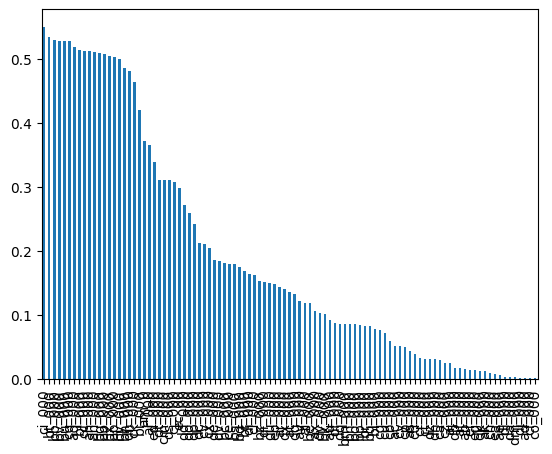

In [122]:

train_df_for_corr["label"].abs()[numerical_columns].sort_values(ascending=False).plot(kind='bar')
relevant_col_bools = train_df_for_corr["label"].abs()[numerical_columns].sort_values(ascending=False) > 0.3


In [123]:
train_df_for_corr["label"].abs()[numerical_columns].sort_values(ascending=False)

ci_000    0.550049
bt_000    0.533964
bb_000    0.529501
bv_000    0.528056
bu_000    0.528056
            ...   
dm_000    0.002839
dj_000    0.001098
ad_000    0.000530
cf_000    0.000530
co_000    0.000527
Name: label, Length: 99, dtype: float64

<Axes: >

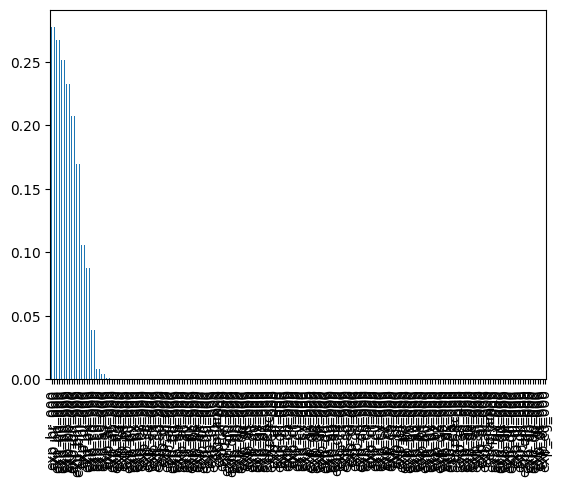

In [128]:
train_df_for_corr['label'].filter(regex='^exp_').abs().sort_values(ascending=False).plot(kind='bar')


<Axes: >

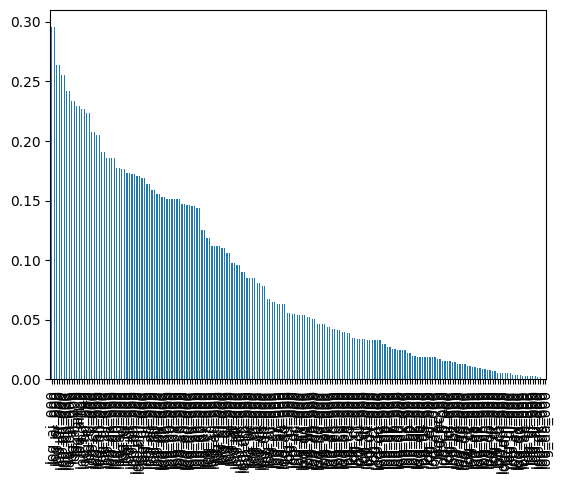

In [129]:
train_df_for_corr['label'].filter(regex='^log_').abs().sort_values(ascending=False).plot(kind='bar')

In [130]:
#get the columns that are relevant >.2
relevant_col_bools = train_df_for_corr["label"].abs()[numerical_columns].sort_values(ascending=False) > 0.20
relevant_numerical_cols = relevant_col_bools[relevant_col_bools].index


In [ ]:
#add two column types together
num_cat_cols = pd.Index(categorical_cols).append(pd.Index(relevant_numerical_cols))

In [173]:
#create neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

def get_model_for_aug_data(input_size= len(num_cat_cols)):

    model = Sequential()
    model.add(Dense(64, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5), activity_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model




In [179]:
aug_model = get_model_for_aug_data()
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)


/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
aug_model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

In [171]:
#copy model for fine tuning
from keras.models import clone_model
aug_model_2 = clone_model(aug_model)
aug_model_2.set_weights(aug_model.get_weights())

In [172]:
y_pred = aug_model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


619/619 [==============================] - 0s 449us/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     19470
           1       0.33      0.93      0.49       330

    accuracy                           0.97     19800
   macro avg       0.66      0.95      0.74     19800
weighted avg       0.99      0.97      0.97     19800

[[18844   626]
 [   22   308]]


In [166]:
#finetune with a diffent objective function


import keras.backend as K

def weighted_binary_crossentropy(y_true, y_pred):
    # Cast y_true to float32
    y_true = K.cast(y_true, 'float32')

    # Calculate the binary cross entropy
    bce = K.binary_crossentropy(y_true, y_pred)

    # Define the weights
    weight_for_false_negatives = K.constant(500.0)  # Use keras constant for float
    weight_for_false_positives = K.constant(10.0)   # Use keras constant for float

    # Apply the weights
    weight_vector = y_true * weight_for_false_negatives + (1 - y_true) * weight_for_false_positives
    weighted_bce = weight_vector * bce

    return K.mean(weighted_bce)

adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

aug_model.compile(optimizer='adam', loss=weighted_binary_crossentropy, metrics=['accuracy'])

/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [167]:
aug_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/20
315/315 [==============================] - 1s 3ms/step - loss: 4.5242 - accuracy: 0.9624 - val_loss: 2.7047 - val_accuracy: 0.9420
Epoch 2/20
315/315 [==============================] - 1s 2ms/step - loss: 3.2109 - accuracy: 0.9471 - val_loss: 3.1082 - val_accuracy: 0.9543
Epoch 3/20
315/315 [==============================] - 1s 2ms/step - loss: 2.9003 - accuracy: 0.9556 - val_loss: 3.0364 - val_accuracy: 0.9583
Epoch 4/20
315/315 [==============================] - 1s 2ms/step - loss: 2.8530 - accuracy: 0.9570 - val_loss: 2.8492 - val_accuracy: 0.9703
Epoch 5/20
315/315 [==============================] - 1s 2ms/step - loss: 2.9514 - accuracy: 0.9570 - val_loss: 3.0863 - val_accuracy: 0.9686
Epoch 6/20
315/315 [==============================] - 1s 2ms/step - loss: 2.5472 - accuracy: 0.9584 - val_loss: 3.0928 - val_accuracy: 0.9702
Epoch 7/20
315/315 [==============================] - 1s 2ms/step - loss: 2.5023 - accuracy: 0.9636 - val_loss: 3.1843 - val_accuracy: 0.9519
Epoch 

In [168]:
y_pred = aug_model.predict(X_test)

y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

619/619 [==============================] - 0s 342us/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     19470
           1       0.33      0.93      0.49       330

    accuracy                           0.97     19800
   macro avg       0.66      0.95      0.74     19800
weighted avg       0.99      0.97      0.97     19800

[[18844   626]
 [   22   308]]


In [169]:
test_df

,id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,exp_dv_000,exp_dx_000,exp_dy_000,exp_dz_000,exp_ea_000,exp_eb_000,exp_ec_00,exp_ed_000,exp_ef_000,exp_eg_000
0,1,60,0,20,12,0,0,0,0,0,...,0.000000e+00,1.0,5.459815e+01,1.0,1.0,1.0,1.459087e+202,1.220403e+39,1.0,1.0
1,2,82,0,68,40,0,0,0,0,0,...,0.000000e+00,0.0,4.311232e+15,1.0,1.0,1.0,1.746153e+01,1.986265e+44,1.0,1.0
2,3,66002,2,212,112,0,0,0,0,0,...,0.000000e+00,0.0,0.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000e+00,1.0,1.0
3,4,59816,na,1010,936,0,0,0,0,0,...,0.000000e+00,1.0,1.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000e+00,1.0,1.0
4,5,1814,na,156,140,0,0,0,0,0,...,1.294273e+171,0.0,5.920972e+47,1.0,1.0,0.0,2.810410e+49,3.831008e+22,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15996,81852,na,2130706432,892,0,0,0,0,0,...,0.000000e+00,0.0,0.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000e+00,1.0,1.0
15996,15997,18,0,52,46,8,26,0,0,0,...,4.572186e+147,0.0,2.980958e+03,1.0,1.0,1.0,2.664456e+00,5.184706e+21,1.0,1.0
15997,15998,79636,na,1670,1518,0,0,0,0,0,...,0.000000e+00,0.0,0.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000e+00,1.0,1.0
15998,15999,110,na,36,32,0,0,0,0,0,...,1.000000e+00,0.0,2.688117e+43,1.0,1.0,1.0,1.336514e+58,2.872650e+56,1.0,1.0


In [170]:
#use test set to predict
log_df = test_df[numerical_columns].replace('na', 0).astype(float).apply(np.log)
log_df = log_df.replace(-np.inf, 0)
log_df = log_df.replace(np.inf, 0)
log_df = log_df.replace(np.nan, 0)

exp_df = test_df[numerical_columns].replace('na', 0).astype(float).apply(np.exp)
exp_df = exp_df.replace(-np.inf, 0)
exp_df = exp_df.replace(np.inf, 0)
exp_df = exp_df.replace(np.nan, 0)

#create a new pandas df with the log and exp columns and name them accordingly
log_df.columns = log_df.columns.map(lambda x: 'log_' + x)
exp_df.columns = exp_df.columns.map(lambda x: 'exp_' + x)

#concatenate the log and exp columns with the original df
test_df = pd.concat([test_df, log_df, exp_df], axis=1)

X = test_df[num_cat_cols].replace('na', 0).astype(float).values


X_transformed = StandardScaler().fit_transform(X)
y_pred_ = aug_model.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})
output.to_csv('categorical+relevant numerical values standardized neural network with custom obj func finetuned 20 epochs', index=False)


500/500 [==============================] - 0s 348us/step


In [189]:
#lets do xgboost with the augmented data
import xgboost as xgb

clf = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42,
    scale_pos_weight=1000,
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19470
           1       0.73      0.86      0.79       330

    accuracy                           0.99     19800
   macro avg       0.86      0.93      0.89     19800
weighted avg       0.99      0.99      0.99     19800

[[19364   106]
 [   45   285]]


In [300]:
#define custom scoring for CV
from sklearn.metrics import make_scorer
def custom_cost_score(y_true, y_pred):
    # Define your costs
    Cost_1 = 10  # Cost for false positives
    Cost_2 = 500  # Cost for false negatives

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate the total cost
    total_cost = (Cost_1 * fp + Cost_2 * fn)
    return total_cost

# Create a scorer object
custom_scorer = make_scorer(custom_cost_score, greater_is_better=False)


In [229]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, ],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 1.0],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [5, 50 ,100, 500, 100]
}

# Initialize the XGBClassifier
clf = xgb.XGBClassifier(
    random_state=42,
    n_estimators=-1,
  )


# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=custom_scorer,
    cv=3,  # Number of cross-validation folds (3-fold cross-validation)
    verbose=3,
    n_jobs=-1  # Use all available cores
)

grid_search.fit(X_transformed, Y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, scale_pos_weight=5, subsample=0.5;, score=18002.000 total time=   0.8s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, scale_pos_weight=5, subsample=0.5;, score=17996.000 total time=   0.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, scale_pos_weight=5, subsample=1.0;, score=18002.000 total time=   0.7s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, scale_pos_weight=5, subsample=1.0;, score=18002.000 total time=   0.7s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, scale_pos_weight=5, subsample=0.5;, score=18002.000 total time=   0.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, scale_pos_weight=50, subsample=0.5;, score=18002.000 total time=   0.7s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, scale_pos_weight=50, subsample=0.5;

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=-1,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3],
                         'scale_pos_weight': [5, 50, 100, 500, 100],
                         'subsample': [0.5, 1.0]},
             scoring=make_scorer(custom_cost_score, greater_is_better=False),
             verbose=3)

In [230]:
grid_search.best_score_

18000.0

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)

clf = xgb.XGBClassifier(
    n_estimators=-1,
    random_state=42,

    **grid_search.best_params_
)

In [232]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=-1, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [233]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19470
           1       0.00      0.00      0.00       330

    accuracy                           0.98     19800
   macro avg       0.49      0.50      0.50     19800
weighted avg       0.97      0.98      0.98     19800

[[19470     0]
 [  330     0]]


/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [234]:
#random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=9, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=1000,
                       random_state=42)

In [236]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19470
           1       0.41      0.90      0.56       330

    accuracy                           0.98     19800
   macro avg       0.70      0.94      0.77     19800
weighted avg       0.99      0.98      0.98     19800

[[19040   430]
 [   33   297]]


In [241]:
#random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=42, class_weight={0: 1, 1: 500})
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19470
           1       0.21      0.97      0.34       330

    accuracy                           0.94     19800
   macro avg       0.60      0.95      0.65     19800
weighted avg       0.99      0.94      0.96     19800

[[18237  1233]
 [   11   319]]


In [246]:
#use test set to predict
X = test_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})
output.to_csv('categorical+relevant numerical values ln e transformations standardized random forest witjh 1:500 biasing.csv', index=False)


In [250]:
#random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=42, class_weight={0: 1, 1: 250})
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


#use test set to predict
X = test_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})
output.to_csv('categorical+relevant numerical values ln e transformations standardized random forest witjh 1:250 biasing.csv', index=False)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19470
           1       0.23      0.96      0.37       330

    accuracy                           0.94     19800
   macro avg       0.61      0.95      0.67     19800
weighted avg       0.99      0.94      0.96     19800

[[18389  1081]
 [   14   316]]


In [252]:
output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})
output.to_csv('categorical+relevant numerical values ln e transformations standardized random forest witjh 1:250 biasing.csv', index=False)

In [256]:
#use test set to predict

X = test_df[num_cat_cols].replace('na', 0).astype(float).values

X_transformed = StandardScaler().fit_transform(X)

y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})
output.to_csv('categorical+relevant numerical values ln e transformations standardized random forest with 1:500 biasing entire dataset.csv', index=False)

In [254]:
#train an svm
from sklearn.svm import SVC

clf = SVC(gamma='auto', class_weight={0: 1, 1: 500}, degree=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19470
           1       0.33      0.60      0.43       330

    accuracy                           0.97     19800
   macro avg       0.66      0.79      0.71     19800
weighted avg       0.98      0.97      0.98     19800

[[19075   395]
 [  133   197]]


bad performance by svm

In [307]:
# lets hyperparameter tune the Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 6, 9, 12, 15],
    'class_weight': [ {0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 10},{0: 1, 1: 25},{0: 1, 1: 50}, {0: 1, 1: 100} ,{0: 1, 1: 500}, {0: 1, 1: 1000}, {0: 1, 1: 2000}],
    'random_state': [42]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=custom_scorer,
    cv=3,  # Number of cross-validation folds (3-fold cross-validation)
    verbose=3,
    n_jobs=-1  # Use all available cores
)

grid_search.fit(X_transformed, Y)

grid_search.best_score_

grid_search.best_params_


Fitting 3 folds for each of 45 candidates, totalling 135 fits


[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=3, random_state=42;, score=-111160.000 total time=   7.6s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=3, random_state=42;, score=-112680.000 total time=   8.0s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=3, random_state=42;, score=-119090.000 total time=   8.3s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=6, random_state=42;, score=-77690.000 total time=  16.3s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=6, random_state=42;, score=-76730.000 total time=  16.6s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=6, random_state=42;, score=-72230.000 total time=  16.9s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=9, random_state=42;, score=-60760.000 total time=  24.6s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=9, random_state=42;, score=-63210.000 total time=  24.8s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=9, random_state=42;, score=-64810.000 total time=  25.9s
[CV 1/3] END class_weight={0: 1, 1

{'class_weight': {0: 1, 1: 500}, 'max_depth': 6, 'random_state': 42}

In [309]:
# train a random forest with the best params

clf = RandomForestClassifier(**grid_search.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

KeyboardInterrupt: 

We found the same hyperparameters :D

In [312]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 4.6 MB/s eta 0:00:0000:0100:01
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 14.2 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [316]:
# train a catboost model

from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=1000, learning_rate=0.01, random_seed=42,  depth=10, loss_function='Logloss', class_weights={0:1, 1:1000}, logging_level='Silent')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     19470
           1       0.26      0.97      0.41       330

    accuracy                           0.95     19800
   macro avg       0.63      0.96      0.69     19800
weighted avg       0.99      0.95      0.97     19800

[[18558   912]
 [   11   319]]


In [317]:
custom_cost_score(y_test, y_pred)

14620

In [319]:
# use test set to predict

X = test_df[num_cat_cols].replace('na', 0).astype(float).values

X_transformed = StandardScaler().fit_transform(X)

y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})

output.to_csv('categorical+relevant numerical values ln e transformations standardized catboost with 1:1000 biasing.csv', index=False)

In [323]:
# TODO: hyperparameter tune the catboost model

from sklearn.model_selection import GridSearchCV

param_grid = {

    'depth': [3, 6, 9, 12, 15,20],
    'class_weights': [{0: 1, 1: 50}, {0: 1, 1: 100} ,{0: 1, 1: 500}, {0: 1, 1: 1000}, {0: 1, 1: 2000}],
    'random_seed': [42],
    'iterations': [1000],
    'learning_rate': [0.01, 0.1,],
    'loss_function': ['Logloss', 'CrossEntropy']
}

clf = CatBoostClassifier()

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=custom_scorer,
    cv=3,  # Number of cross-validation folds (3-fold cross-validation)
    verbose=3,
    n_jobs=-1  # Use all available cores
)

X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)

grid_search.fit(X_transformed, Y)

grid_search.best_score_

grid_search.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 2/3] END class_weights={0: 1, 1: 50}, depth=3, iterations=1000, learning_rate=0.01, loss_function=CrossEntropy, random_seed=42;, score=nan total time=   2.2s
[CV 1/3] END class_weights={0: 1, 1: 50}, depth=3, iterations=1000, learning_rate=0.01, loss_function=CrossEntropy, random_seed=42;, score=nan total time=   2.4s
[CV 3/3] END class_weights={0: 1, 1: 50}, depth=3, iterations=1000, learning_rate=0.01, loss_function=CrossEntropy, random_seed=42;, score=nan total time=   2.3s
0:	learn: 0.6797928	total: 171ms	remaining: 2m 50s
0:	learn: 0.6793792	total: 283ms	remaining: 4m 42s
0:	learn: 0.6799105	total: 305ms	remaining: 5m 4s
0:	learn: 0.5698952	total: 239ms	remaining: 3m 58s
1:	learn: 0.6683455	total: 395ms	remaining: 3m 17s
1:	learn: 0.6661885	total: 433ms	remaining: 3m 36s
1:	learn: 0.6665438	total: 409ms	remaining: 3m 24s
0:	learn: 0.5710522	total: 286ms	remaining: 4m 46s
2:	learn: 0.6542673	total: 512ms	remaining: 

KeyboardInterrupt: 